<a href="https://colab.research.google.com/github/FandiAR/py_datax/blob/main/modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing

In [2]:
# import data dan print data teratas
df = pd.read_csv('/content/house.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
# mendapatkan informasi data, termasuk tipe data tiap column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [4]:
# mendapatkan informasi statistik deskriptif data
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [5]:
df[df['price'] == df['price'].min()]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4354,2014-05-05 00:00:00,0.0,3.0,1.75,1490,10125,1.0,0,0,4,1490,0,1962,0,3911 S 328th St,Federal Way,WA 98001,USA
4356,2014-05-05 00:00:00,0.0,4.0,2.75,2600,5390,1.0,0,0,4,1300,1300,1960,2001,2120 31st Ave W,Seattle,WA 98199,USA
4357,2014-05-05 00:00:00,0.0,6.0,2.75,3200,9200,1.0,0,2,4,1600,1600,1953,1983,12271 Marine View Dr SW,Burien,WA 98146,USA
4358,2014-05-06 00:00:00,0.0,5.0,3.50,3480,36615,2.0,0,0,4,2490,990,1983,0,21809 SE 38th Pl,Issaquah,WA 98075,USA
4361,2014-05-07 00:00:00,0.0,5.0,1.50,1500,7112,1.0,0,0,5,760,740,1920,0,14901-14999 12th Ave SW,Burien,WA 98166,USA
4362,2014-05-07 00:00:00,0.0,4.0,4.00,3680,18804,2.0,0,0,3,3680,0,1990,2009,1223-1237 244th Ave NE,Sammamish,WA 98074,USA
4374,2014-05-09 00:00:00,0.0,2.0,2.50,2200,188200,1.0,0,3,3,2200,0,2007,0,39612 254th Ave SE,Enumclaw,WA 98022,USA
4376,2014-05-09 00:00:00,0.0,4.0,2.25,2170,10500,1.0,0,2,4,1270,900,1960,2001,216 SW 183rd St,Normandy Park,WA 98166,USA
4382,2014-05-12 00:00:00,0.0,5.0,4.50,4630,6324,2.0,0,0,3,3210,1420,2006,0,6925 Oakmont Ave SE,Snoqualmie,WA 98065,USA
4383,2014-05-13 00:00:00,0.0,5.0,4.00,4430,9000,2.0,0,0,3,4430,0,2013,1923,9235 NE 5th St,Bellevue,WA 98004,USA


In [6]:
len(df[df['price'] == df['price'].min()])

49

In [7]:
df.shape[0]

4600

In [8]:
len(df[df['price'] == df['price'].min()]) / df.shape[0]

0.010652173913043479

In [9]:
# exclude price 0 dari data
df = df[~(df['price'] == 0.0)]

In [10]:
# cek duplikasi data
df.duplicated().sum()

np.int64(0)

In [11]:
# deteksi informasi kategorikal
cat_col = [i for i in df.columns if df[i].dtype == 'object']
cat_col

['date', 'street', 'city', 'statezip', 'country']

In [12]:
# deteksi numerical column
num_col = [i for i in df.columns if i not in cat_col]
num_col

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated']

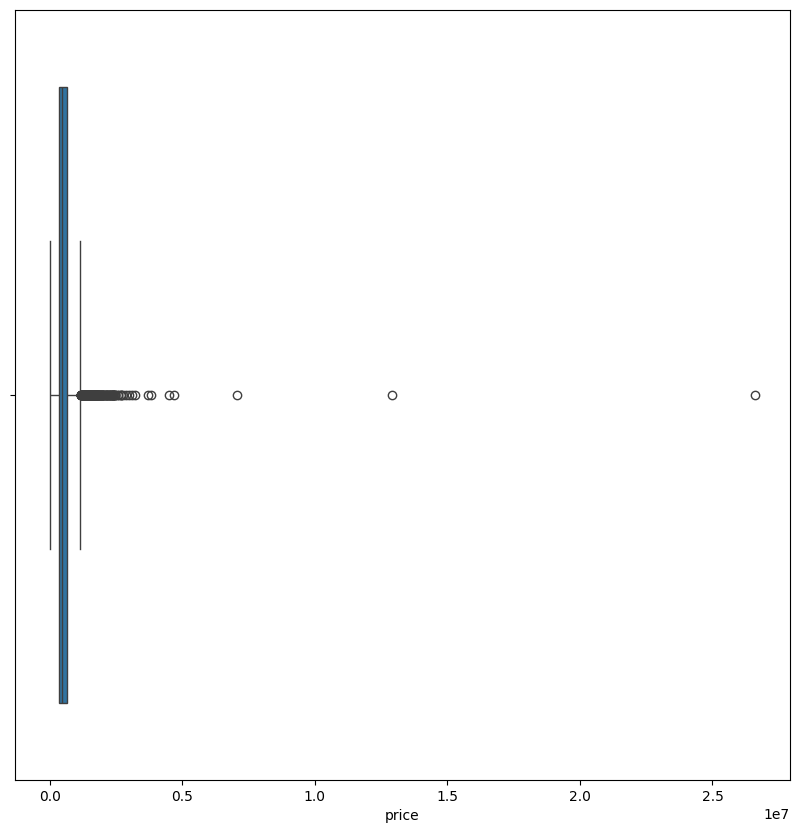

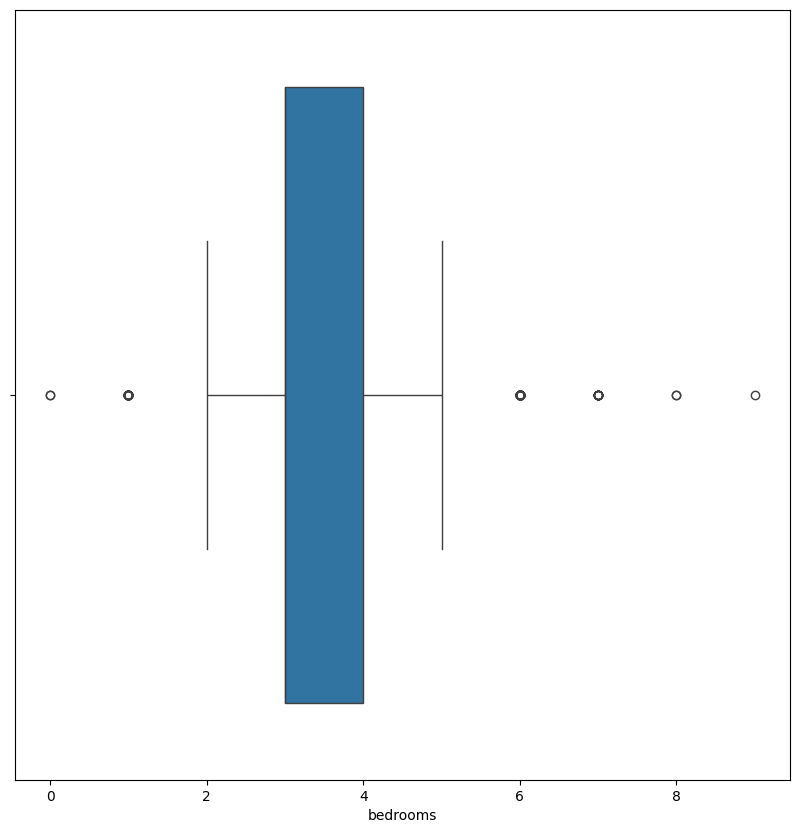

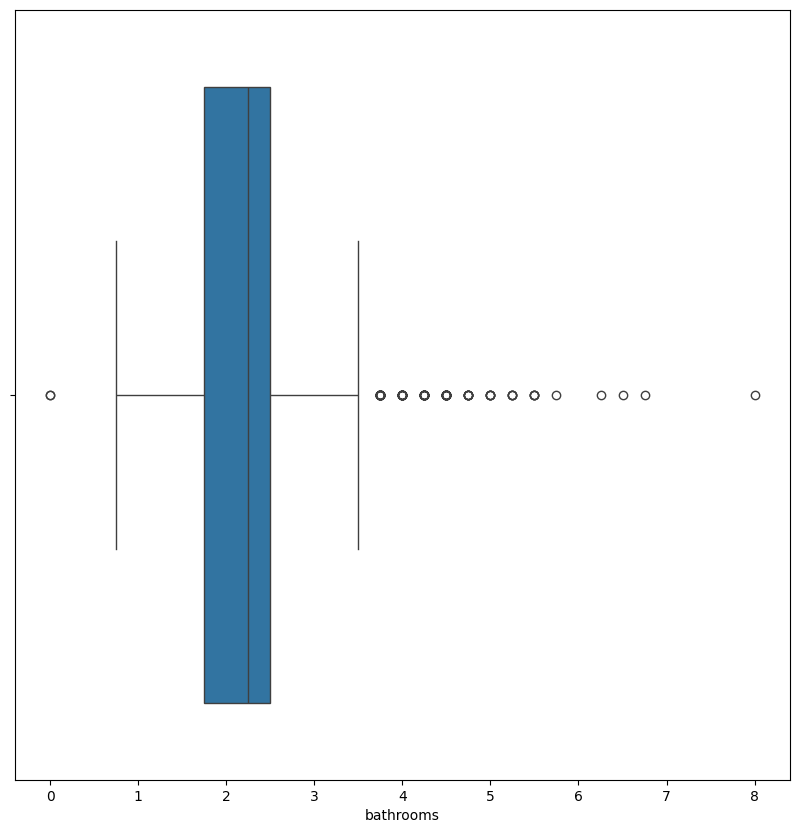

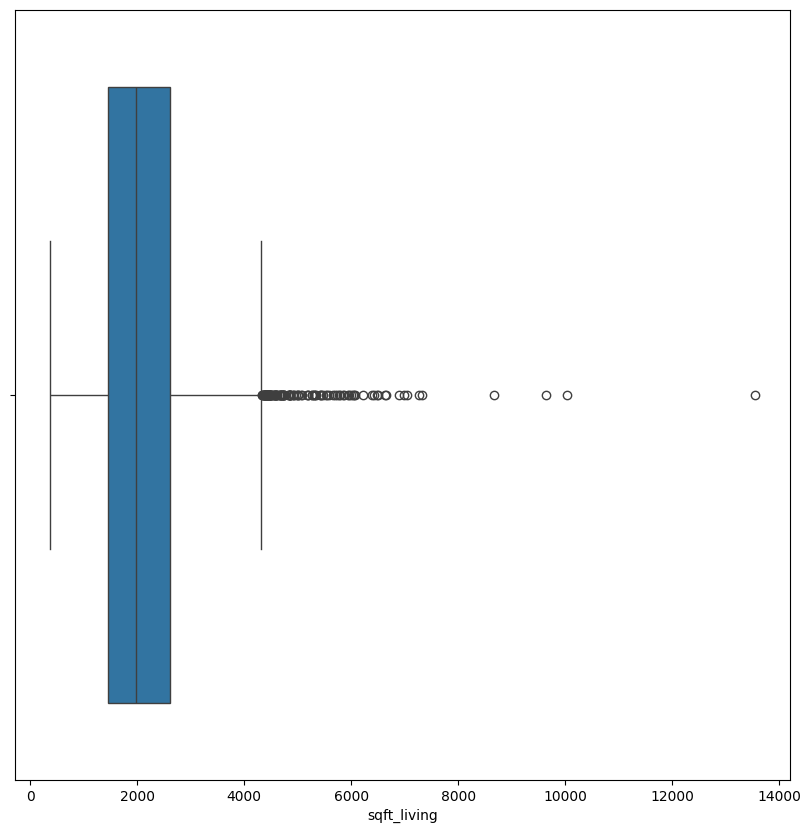

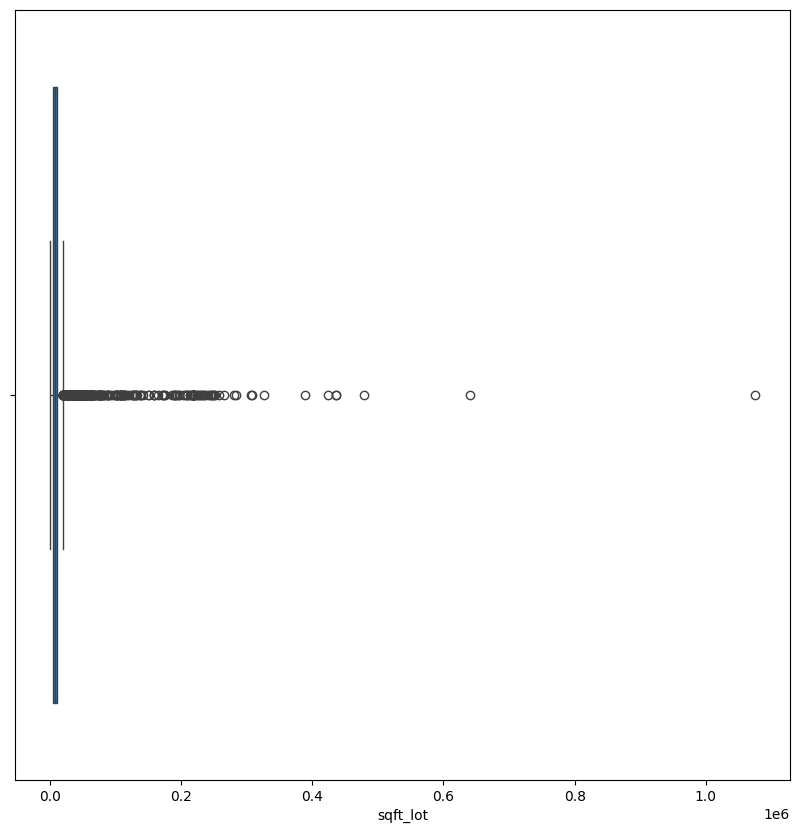

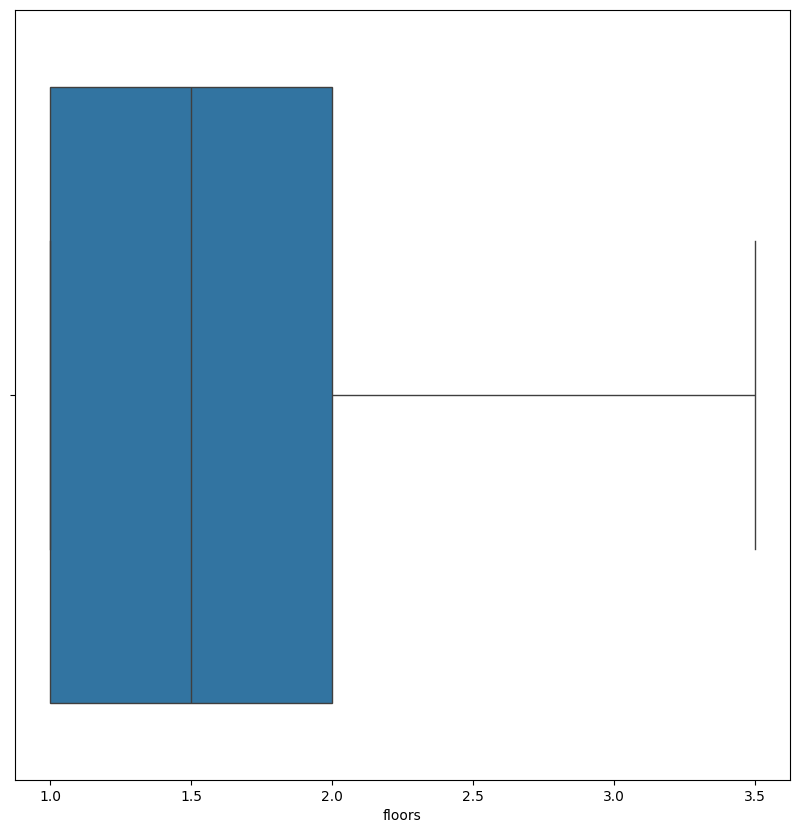

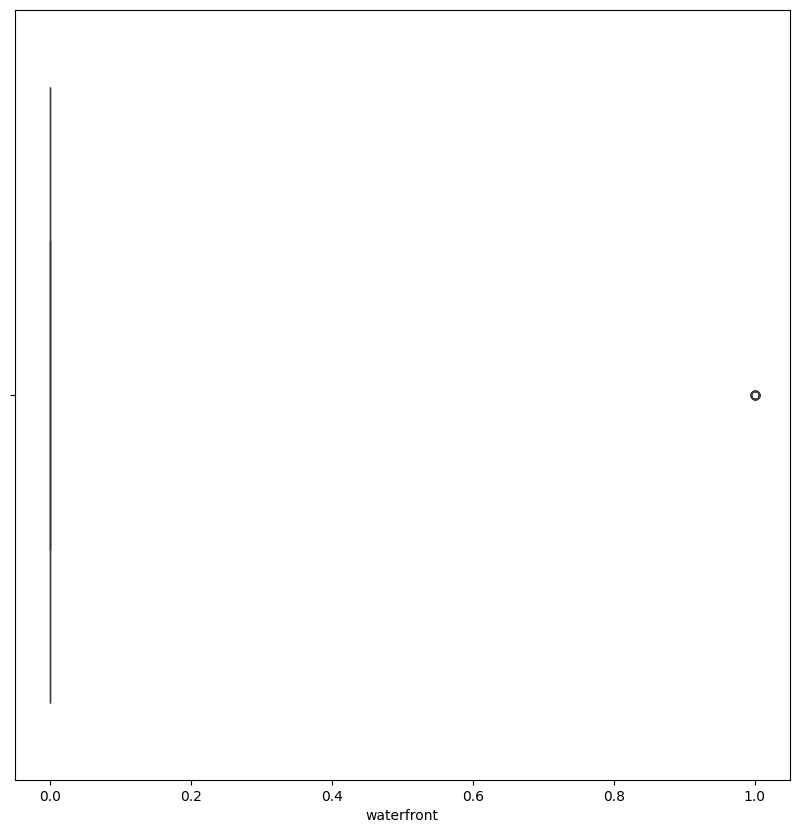

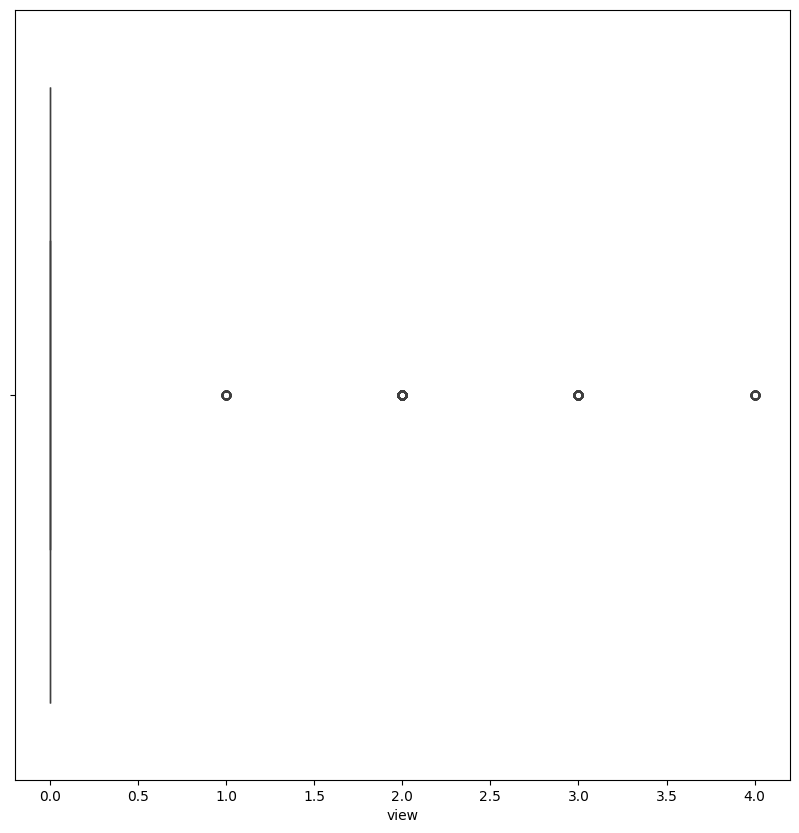

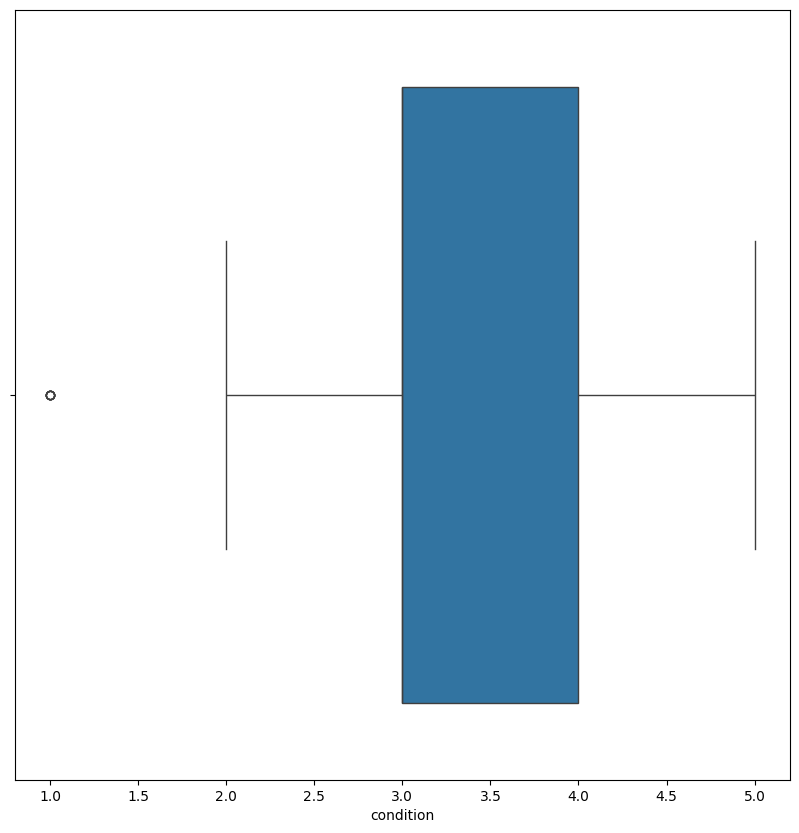

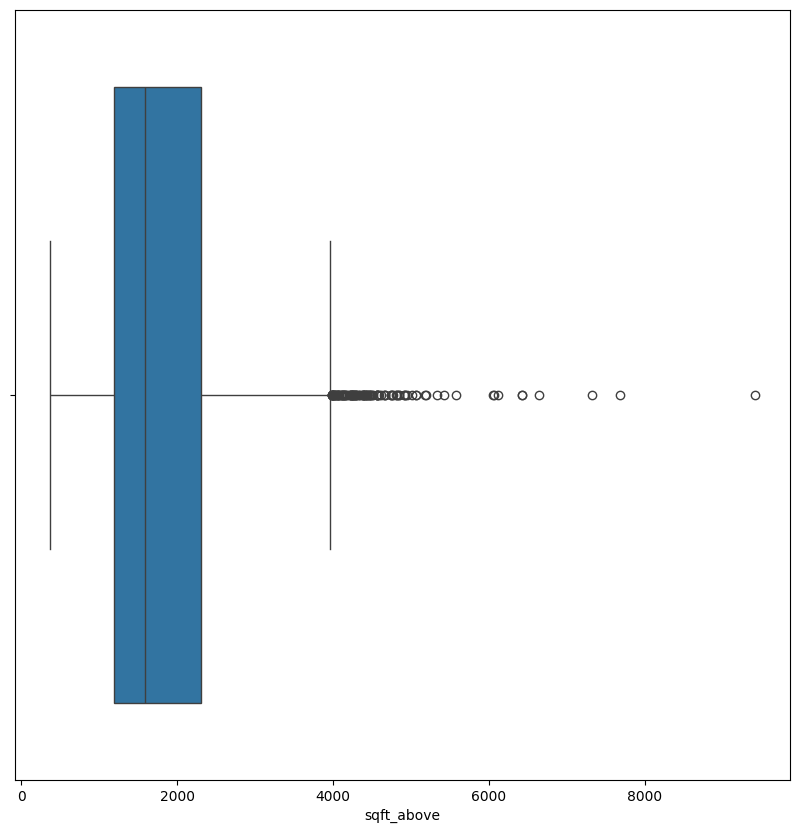

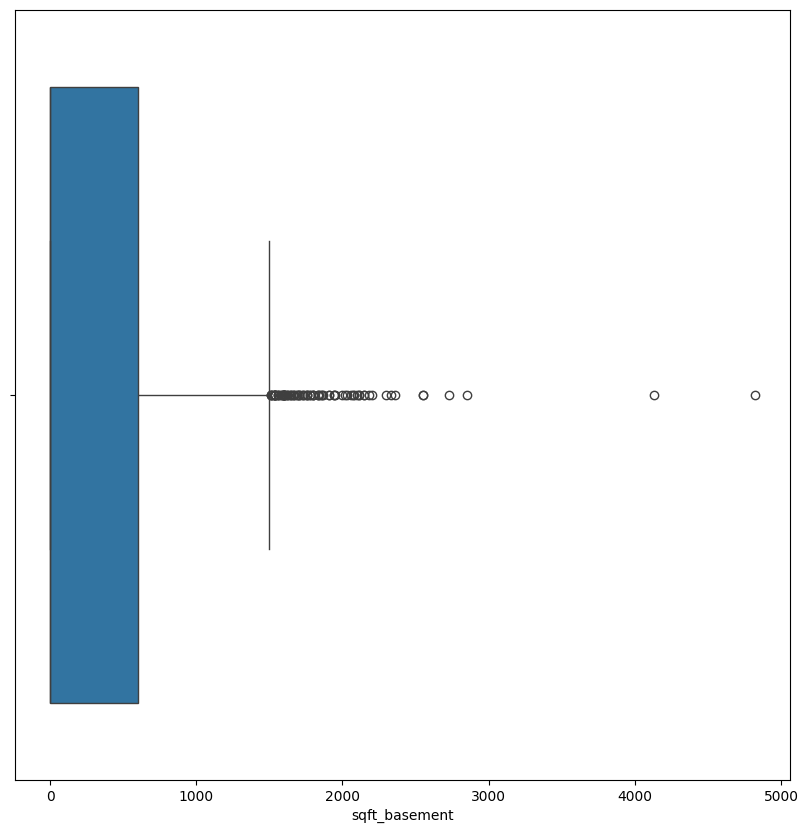

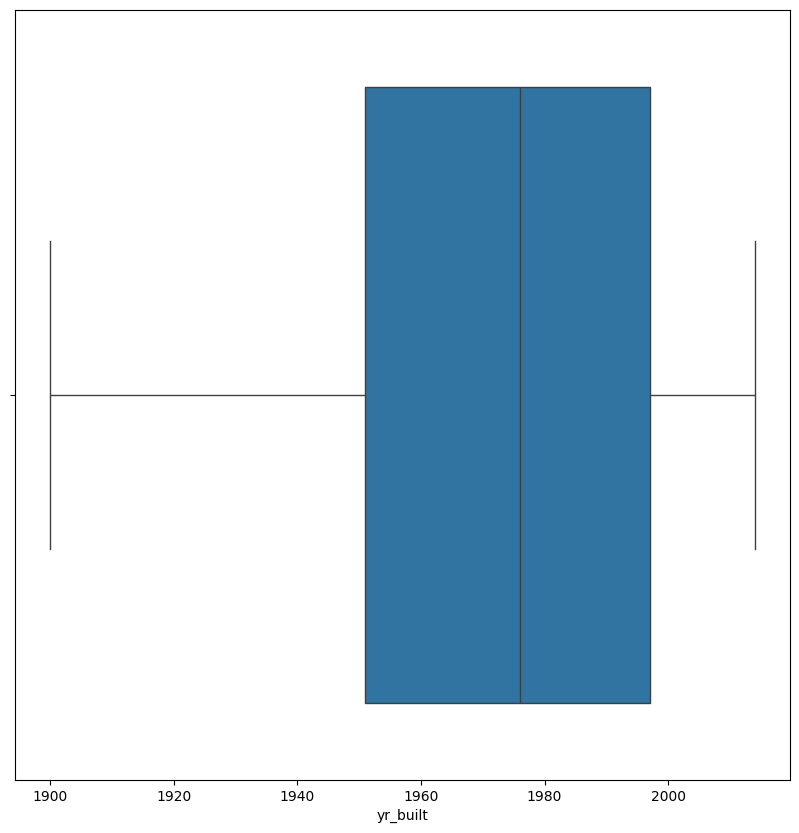

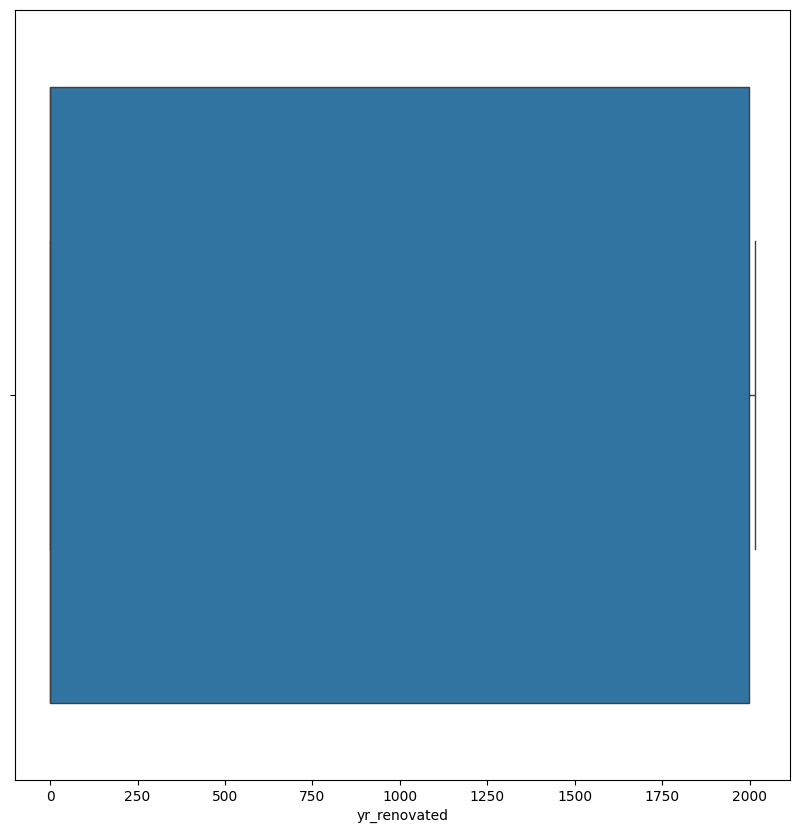

In [13]:
# untuk melihat numerical pakai float check outlayer pake boxplot
# number plot cek outlier boxplot
for i in num_col:
  plt.figure(figsize=(10,10))
  sns.boxplot(x=df[i])

In [14]:
# cek kardinalitas data kategorikal
for i in cat_col:
  print(i, ':', df[i].nunique())
# street nggak bisa dipake, karena terlalu tinggi, harus di exclude
# country juga cuma 1, harus

date : 70
street : 4476
city : 44
statezip : 77
country : 1


In [15]:
df.shape[0]

4551

In [16]:
# liat kardinalitas di spesifik column city
df['city'].value_counts()

,count
city,
Seattle,1561
Renton,291
Bellevue,281
Redmond,235
Kirkland,187
Issaquah,186
Kent,184
Auburn,175
Sammamish,171


In [17]:
# liat kardinalitas di spesifik column statezip
df['statezip'].value_counts()

,count
statezip,
WA 98103,148
WA 98052,135
WA 98117,132
WA 98115,129
WA 98006,109
...,...
WA 98047,6
WA 98288,3
WA 98050,2


In [18]:
# exclude country, date
# gabungin kardinalitas tinggi di city dan statezip
for i in ['city', 'statezip']:
  df_city = df[i].value_counts().reset_index()
  df[i] = df[i].where(df[i].isin(
      df_city[df_city['count'] > 50][i].to_list()
  ), 'other')

In [19]:
# exclude country, date
df = df.drop(['country', 'date'], axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,other
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,other
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052


<Axes: >

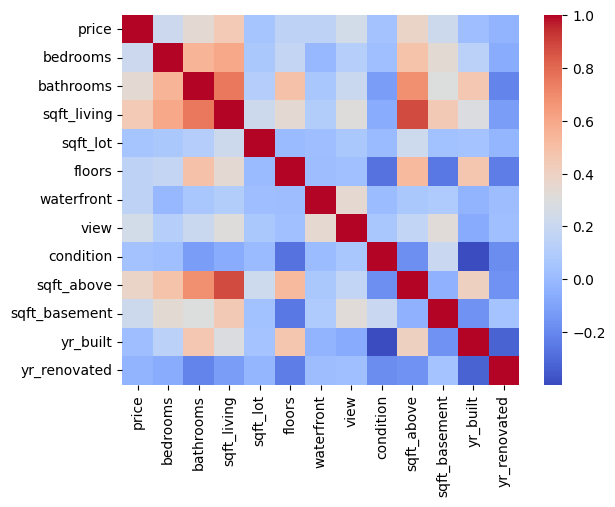

In [20]:
# menggambarkan korelasi antara variable numerikal dengan price
sns.heatmap(df[num_col].corr(), cmap='coolwarm')

<Axes: xlabel='yr_renovated', ylabel='price'>

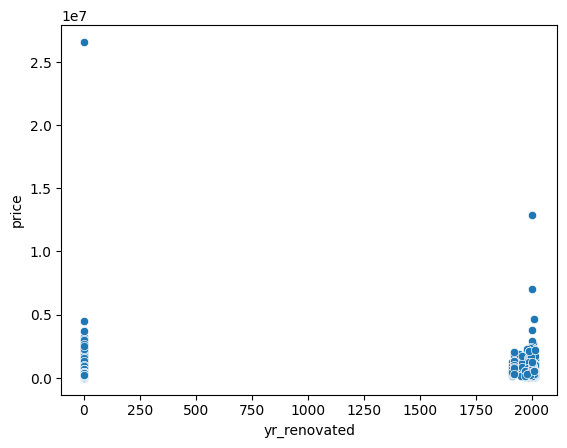

In [21]:
sns.scatterplot(df, x='yr_renovated', y='price')

In [22]:
# ubah jadi berapa tahun yr_renovated dan yr_built
for i in ['yr_renovated', 'yr_built']:
  df[i] = 2025 - df[i]

df['yr_renovated'] = df['yr_renovated'].where(df['yr_renovated'].isin([2025]), 0)
df['yr_built'].value_counts()

,count
yr_built,
19,109
20,103
18,92
21,92
47,90
...,...
110,6
90,6
92,5


<Axes: >

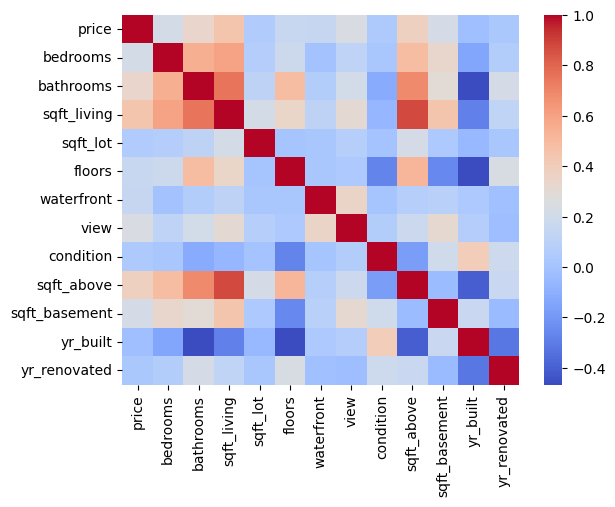

In [23]:
# menggambarkan korelasi antara variable numerikal dengan price
sns.heatmap(df[num_col].corr(), cmap='coolwarm')

<Axes: xlabel='yr_built', ylabel='price'>

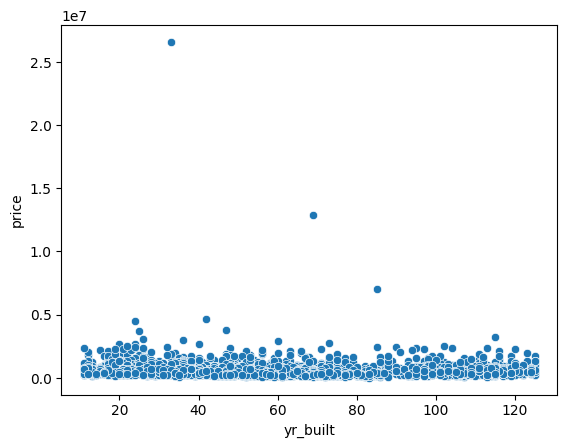

In [25]:
sns.scatterplot(df, x='yr_built', y='price')

In [27]:
# check multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
  # Calculating vif
  vif = pd.DataFrame()
  vif['variables'] = X.columns
  vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  return vif

calc_vif(df[num_col])

,variables,VIF
0,price,2.581684
1,bedrooms,23.368148
2,bathrooms,27.807494
3,sqft_living,inf
4,sqft_lot,1.260209
5,floors,13.948604
6,waterfront,1.156147
7,view,1.451569
8,condition,24.698470
9,sqft_above,inf


In [31]:
# cek linear data
import statsmodels.api as sm

y = df['price']
X = df[['sqft_lot', 'waterfront', 'view', 'yr_built', 'yr_renovated']]
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.476
Model:                            OLS   Adj. R-squared (uncentered):              0.475
Method:                 Least Squares   F-statistic:                              825.0
Date:                Sun, 24 Aug 2025   Prob (F-statistic):                        0.00
Time:                        07:37:17   Log-Likelihood:                         -66808.
No. Observations:                4551   AIC:                                  1.336e+05
Df Residuals:                    4546   BIC:                                  1.337e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
sqft_lot         1.3566      0.235      5.784      0.000       0.897       1.816
waterfront    4.997e+05   1.12e+05      4.451      0.000     2.8e+05     7.2e+05
view          1.738e+05   1.19e+04     14.594      0.000     1.5e+05    1.97e+05
yr_built      4761.5207    174.568     27.276      0.000    4419.282    5103.760
yr_renovated   142.8035      6.779     21.067      0.000     129.514     156.093
==============================================================================
Omnibus:                    10881.285   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        193036566.084
Skew:                          23.897   Prob(JB):                         0.00
Kurtosis:                    1010.823   Cond. No.                     5.13e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

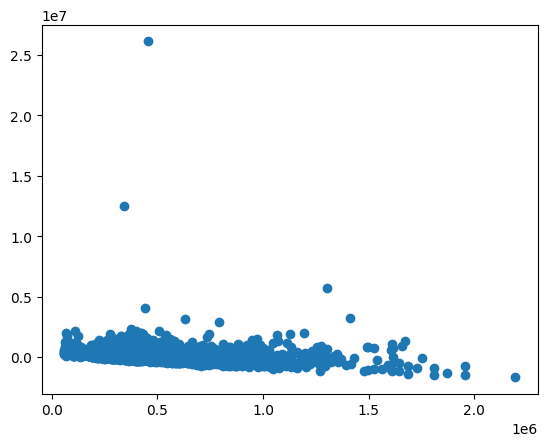

In [35]:
# homoscedasity
residuals = model.resid
fitted_vals = model.fittedvalues

plt.scatter(fitted_vals, residuals)

In [36]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,70,0,18810 Densmore Ave N,Shoreline,WA 98133
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,104,2025,709 W Blaine St,Seattle,other
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,59,2025,26206-26214 143rd Ave SE,Kent,WA 98042
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,62,2025,857 170th Pl NE,Bellevue,other
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,49,0,9105 170th Ave NE,Redmond,WA 98052


# Scaling

In [39]:
# Feature Scaling
x = df[['sqft_lot', 'waterfront', 'view', 'yr_built', 'yr_renovated']]
y = df['price']

# jadikan array x
x = x.values

x

array([[ 7912,     0,     0,    70,     0],
       [ 9050,     0,     4,   104,  2025],
       [11947,     0,     0,    59,  2025],
       ...,
       [ 7014,     0,     0,    16,  2025],
       [ 6630,     0,     0,    51,  2025],
       [ 8102,     0,     0,    35,  2025]])

In [41]:
# Scaling Minmaxscaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
x

array([[0.00677546, 0.        , 0.        , 0.51754386, 0.        ],
       [0.00783547, 0.        , 1.        , 0.81578947, 1.        ],
       [0.01053391, 0.        , 0.        , 0.42105263, 1.        ],
       ...,
       [0.00593901, 0.        , 0.        , 0.04385965, 1.        ],
       [0.00558133, 0.        , 0.        , 0.35087719, 1.        ],
       [0.00695244, 0.        , 0.        , 0.21052632, 1.        ]])

# Modeling

## Linear Regression

total x train:  3640
total y train:  3640
total x test:  911
total y test:  911
MSE:  115727732542.50294
MAE:  223907.82242255638
rmse: 340187.7901137884
R2:  0.222105070729384


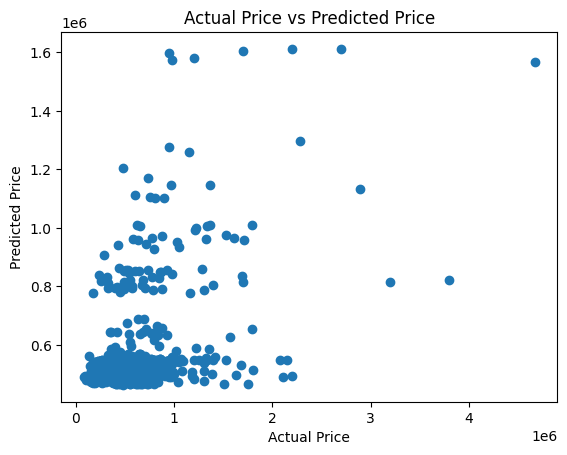

In [56]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print('total x train: ', x_train.shape[0])
print('total y train: ', y_train.shape[0])
print('total x test: ', x_test.shape[0])
print('total y test: ', y_test.shape[0])

# Model Development
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model1.fit(x_train, y_train)

# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import pearsonr
import numpy as np

y_pred = model1.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
r, _ = pearsonr(y_test, y_pred)

print('MSE: ', mse)
print('MAE: ', mae)
print('rmse:', np.sqrt(mse))
print('R2: ', r2)

# Plot Actual Price vs Predicted Price
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

## Desicion Tree

total x train:  3640
total y train:  3640
total x test:  911
total y test:  911
MSE:  169377886127.57172
MAE:  262114.10080967692
rmse: 411555.4472092086
R2:  -0.1385187962688499


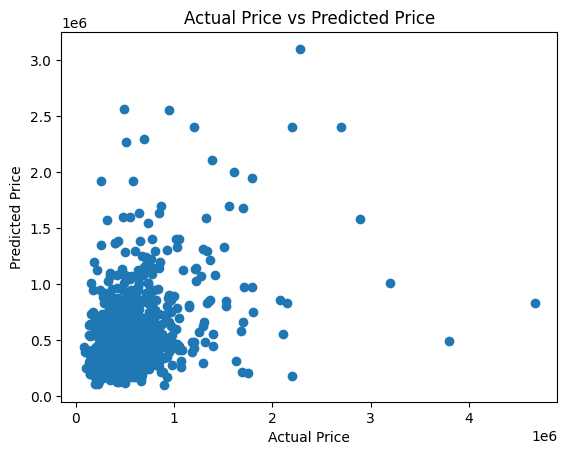

In [57]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print('total x train: ', x_train.shape[0])
print('total y train: ', y_train.shape[0])
print('total x test: ', x_test.shape[0])
print('total y test: ', y_test.shape[0])

# Model Development
from sklearn.tree import DecisionTreeRegressor

model2 = DecisionTreeRegressor()
model2.fit(x_train, y_train)

# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import pearsonr
import numpy as np

y_pred = model2.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
r, _ = pearsonr(y_test, y_pred)

print('MSE: ', mse)
print('MAE: ', mae)
print('rmse:', np.sqrt(mse))
print('R2: ', r2)

# Plot Actual Price vs Predicted Price
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

## Random Forest

total x train:  3640
total y train:  3640
total x test:  911
total y test:  911
MSE:  117318422154.78902
MAE:  217767.28844170723
rmse: 342517.769108099
R2:  0.2114128247460254


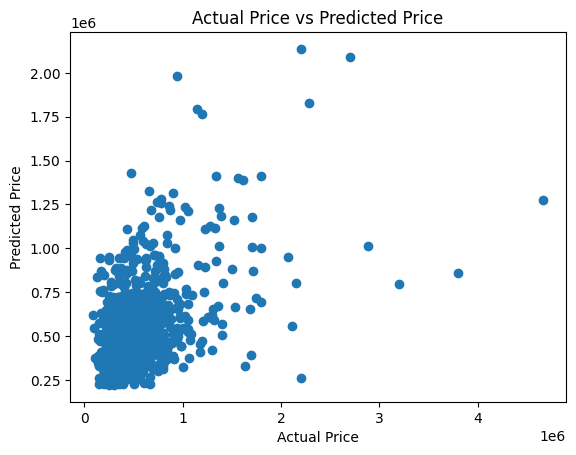

In [58]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print('total x train: ', x_train.shape[0])
print('total y train: ', y_train.shape[0])
print('total x test: ', x_test.shape[0])
print('total y test: ', y_test.shape[0])

# Model Development
from sklearn.ensemble import RandomForestRegressor

model3 = RandomForestRegressor()
model3.fit(x_train, y_train)

# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import pearsonr
import numpy as np

y_pred = model3.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
r, _ = pearsonr(y_test, y_pred)

print('MSE: ', mse)
print('MAE: ', mae)
print('rmse:', np.sqrt(mse))
print('R2: ', r2)

# Plot Actual Price vs Predicted Price
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

## XGBoost

total x train:  3640
total y train:  3640
total x test:  911
total y test:  911
MSE:  130932528066.85373
MAE:  220681.29166754003
rmse: 361846.00048481085
R2:  0.11990196798868968


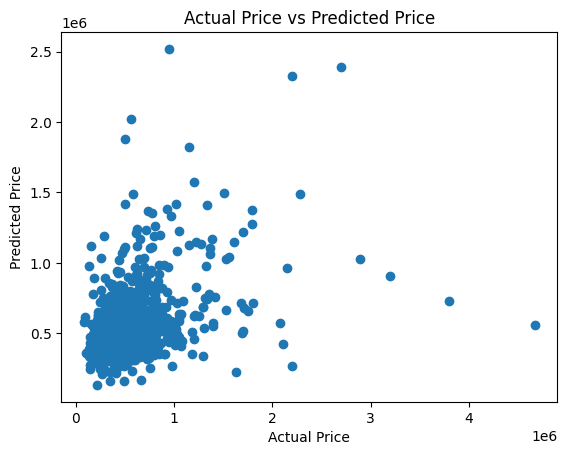

In [59]:
# split data jadi train dan test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print('total x train: ', x_train.shape[0])
print('total y train: ', y_train.shape[0])
print('total x test: ', x_test.shape[0])
print('total y test: ', y_test.shape[0])

# Model Development
import xgboost as xgb

model4 = xgb.XGBRegressor()
model4.fit(x_train, y_train)

# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import pearsonr
import numpy as np

y_pred = model4.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
r, _ = pearsonr(y_test, y_pred)

print('MSE: ', mse)
print('MAE: ', mae)
print('rmse:', np.sqrt(mse))
print('R2: ', r2)

# Plot Actual Price vs Predicted Price
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

## Gradient Boosting Regressor

total x train:  3640
total y train:  3640
total x test:  911
total y test:  911
MSE:  116437794905.95108
MAE:  211138.91185011464
rmse: 341229.82710476976
R2:  0.21733219650246216


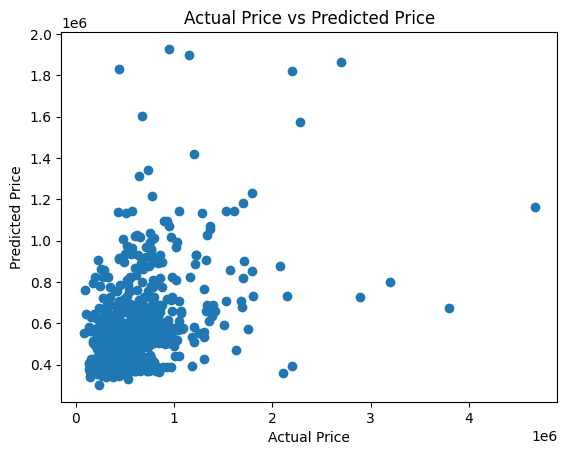

In [60]:
# split data jadi train dan test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print('total x train: ', x_train.shape[0])
print('total y train: ', y_train.shape[0])
print('total x test: ', x_test.shape[0])
print('total y test: ', y_test.shape[0])

# Model Development
from sklearn.ensemble import GradientBoostingRegressor

model5 = GradientBoostingRegressor()
model5.fit(x_train, y_train)

# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import pearsonr
import numpy as np

y_pred = model5.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
r, _ = pearsonr(y_test, y_pred)

print('MSE: ', mse)
print('MAE: ', mae)
print('rmse:', np.sqrt(mse))
print('R2: ', r2)

# Plot Actual Price vs Predicted Price
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

## Neural Networks (Deep Learning)

total x train:  3640
total y train:  3640
total x test:  911
total y test:  911
MSE:  454748468759.8744
MAE:  553261.8346016003
rmse: 674350.4050268483
R2:  -2.0567135479990855


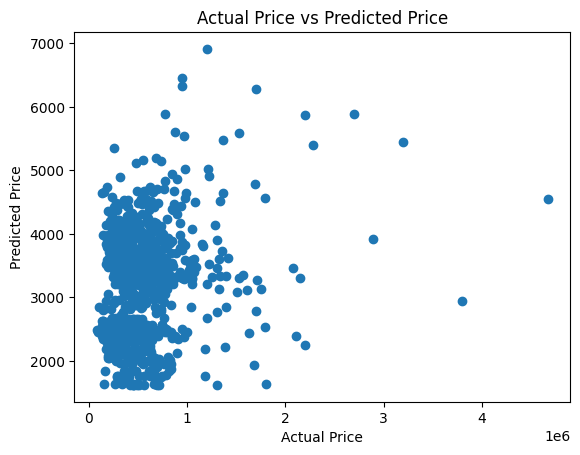

In [61]:
# split data jadi train dan test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print('total x train: ', x_train.shape[0])
print('total y train: ', y_train.shape[0])
print('total x test: ', x_test.shape[0])
print('total y test: ', y_test.shape[0])

# Model Development
from sklearn.neural_network import MLPRegressor

model6 = MLPRegressor()
model6.fit(x_train, y_train)

# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import pearsonr
import numpy as np

y_pred = model6.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
r, _ = pearsonr(y_test, y_pred)

print('MSE: ', mse)
print('MAE: ', mae)
print('rmse:', np.sqrt(mse))
print('R2: ', r2)

# Plot Actual Price vs Predicted Price
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

## Polinomial Regression (Quadratic)

In [53]:
# Scaling Minmaxscaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

x = pd.DataFrame(x, columns=['sqft_lot', 'waterfront', 'view', 'yr_built', 'yr_renovated'])
x

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2) # DEGREE MINIMAL 2, KLO 1 SAMA DENGAN NILAI ASLI
x_poly = poly.fit_transform(x)
x_poly

array([[1.        , 0.00677546, 0.        , ..., 0.26785165, 0.        ,
        0.        ],
       [1.        , 0.00783547, 0.        , ..., 0.66551247, 0.81578947,
        1.        ],
       [1.        , 0.01053391, 0.        , ..., 0.17728532, 0.42105263,
        1.        ],
       ...,
       [1.        , 0.00593901, 0.        , ..., 0.00192367, 0.04385965,
        1.        ],
       [1.        , 0.00558133, 0.        , ..., 0.1231148 , 0.35087719,
        1.        ],
       [1.        , 0.00695244, 0.        , ..., 0.04432133, 0.21052632,
        1.        ]])

total x train:  3640
total y train:  3640
total x test:  911
total y test:  911
MSE:  123135469957.4953
MAE:  221444.6741382334
rmse: 350906.63994500774
R2:  0.17231198098424094


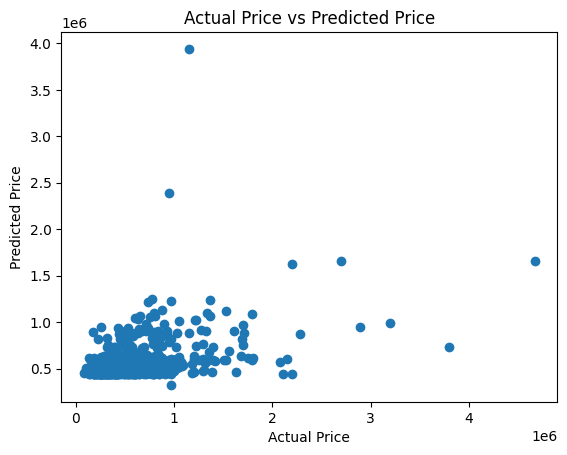

In [62]:
# split data jadi train dan test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_poly,y,test_size=0.2,random_state=42)
print('total x train: ', x_train.shape[0])
print('total y train: ', y_train.shape[0])
print('total x test: ', x_test.shape[0])
print('total y test: ', y_test.shape[0])

# Model Development
model7 = LinearRegression()
model7.fit(x_train, y_train)

# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import pearsonr
import numpy as np

y_pred = model7.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
r, _ = pearsonr(y_test, y_pred)

print('MSE: ', mse)
print('MAE: ', mae)
print('rmse:', np.sqrt(mse))
print('R2: ', r2)

# Plot Actual Price vs Predicted Price
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

## Grid Search

## Compare Stability Models

In [71]:
from sklearn.model_selection import GridSearchCV, cross_val_score
models = [model2, model3, model4, model5, model6]
for model in models:
  print(f"model {model}: {cross_val_score(model, x_train, y_train, cv = 5, scoring = 'neg_mean_absolute_error')}")

model DecisionTreeRegressor(): [-300654.8526045  -325801.51068537 -284241.47478799 -321140.37323078
 -284697.47243364]
model RandomForestRegressor(): [-227734.10695318 -264082.59566893 -226711.91956639 -249645.06801337
 -239367.42987643]
model XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...): [-252

In [72]:
print(f"model {model7}: {cross_val_score(model, x_train, y_train, cv = 5, scoring = 'neg_mean_absolute_error')}")

model LinearRegression(): [-312707.31779642 -388626.33375067 -332651.74956193 -334375.01358868
 -329745.94606851]


In [69]:
# buat x dari selected feature dan y dari price
x = df[['sqft_lot', 'waterfront', 'view', 'yr_built', 'yr_renovated']]
y = df['price']

In [70]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [77]:
param = {'min_samples_split': [2,3,4,5,6], 'min_samples_leaf': [1,2,3,4,5,]}

clf = GridSearchCV(estimator = model5, param_grid = param, cv = 5, n_jobs = -1)
clf.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(min_samples_leaf=3,
                                                 min_samples_split=3),
             n_jobs=-1,
             param_grid={'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5, 6]})

In [78]:
clf.best_params_

{'min_samples_leaf': 3, 'min_samples_split': 4}

total x train:  3640
total y train:  3640
total x test:  911
total y test:  911
MSE:  162141169443.19995
MAE:  219418.01797122543
rmse: 402667.5669124594
R2:  -0.0898752681389492


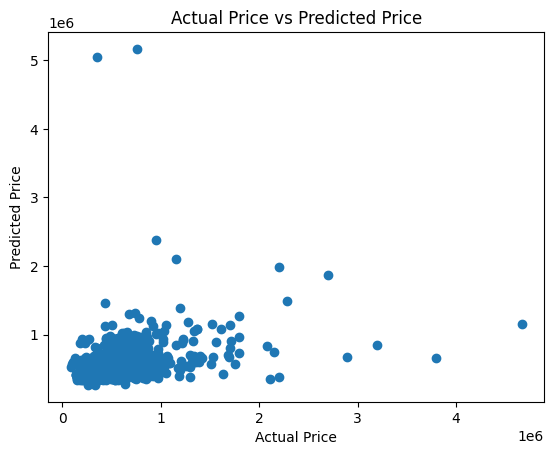

In [79]:
# split data jadi train dan test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print('total x train: ', x_train.shape[0])
print('total y train: ', y_train.shape[0])
print('total x test: ', x_test.shape[0])
print('total y test: ', y_test.shape[0])

# Model Development
from sklearn.ensemble import GradientBoostingRegressor

model5 = GradientBoostingRegressor(min_samples_leaf = 3, min_samples_split = 3)
model5.fit(x_train, y_train)

# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import pearsonr
import numpy as np

y_pred = model5.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
r, _ = pearsonr(y_test, y_pred)

print('MSE: ', mse)
print('MAE: ', mae)
print('rmse:', np.sqrt(mse))
print('R2: ', r2)

# Plot Actual Price vs Predicted Price
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()